# Objective

## Analyze Amazon sales data to understand sales trends, identify top-performing products, and optimize inventory and marketing strategies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("amazon.csv")


# Set the option to show maximum columns

In [3]:
pd.set_option('display.max_columns', None) 

#                                        Get a sneak peek of data
The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest.


In [4]:
# Let's have a look on top 5 rows of the data
df.head(5)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Let's see the column names

In [5]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1465, and columns are 16.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [8]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

  # Observation Set 1

There are 1465 rows and 16 columns in the dataset.
The data type of all columns is object.
The columns in the datasets are:
'product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link'
There are a few missing values in the dataset, which we will read in detail and deal with later on in the notebook.

# Changing Data Types of Columns from object to float

In [9]:
# Changing the data type of discounted price and actual price

df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [10]:
# Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100


In [11]:
# Finding unusual string in rating column
df['rating'].value_counts()[0:10]

rating
4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
Name: count, dtype: int64

In [12]:
# Check the strange row
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


## I got this product rating on Amazon by searching the provided product_id on their official website (amazon.in)
The rating is 3.9. So, I am going to give the item rating a 3.9 as well.

In [13]:
# Changing Rating Columns Data Type

df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

In [14]:
# Changing 'rating_count' Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

# Descriptive Statistics

## Descriptive statistics are a collection of quantitative measures that summarize and describe the main characteristics of a dataset.

In [16]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18295.541353
std,6944.304394,10874.826864,0.216359,0.291620,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


  ## Observation Set 2

## All columns data type was object So, I converted some column data type to float.
There are 4 numeric as per Python coding or descriptive statistics from Python describe function

# Missing Values

In [17]:
df.isnull().sum().sort_values(ascending = False)

rating_count           2
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [18]:
# Find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False) 

rating_count           0.14
product_id             0.00
product_name           0.00
category               0.00
discounted_price       0.00
actual_price           0.00
discount_percentage    0.00
rating                 0.00
about_product          0.00
user_id                0.00
user_name              0.00
review_id              0.00
review_title           0.00
review_content         0.00
img_link               0.00
product_link           0.00
dtype: float64

In [19]:
# Find total number of missing values
df.isnull().sum().sum()

2

# Let's plot the missing values


<Axes: >

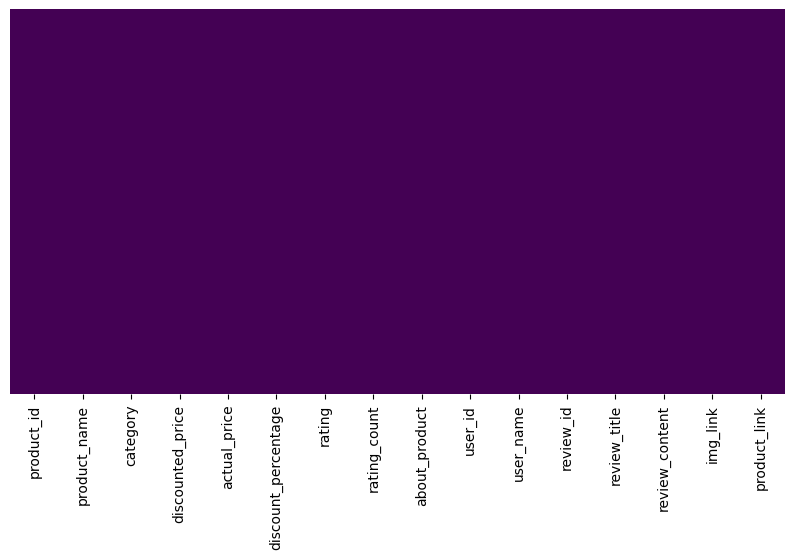

In [20]:
# make a figure size
plt.figure(figsize=(10, 5))
# plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

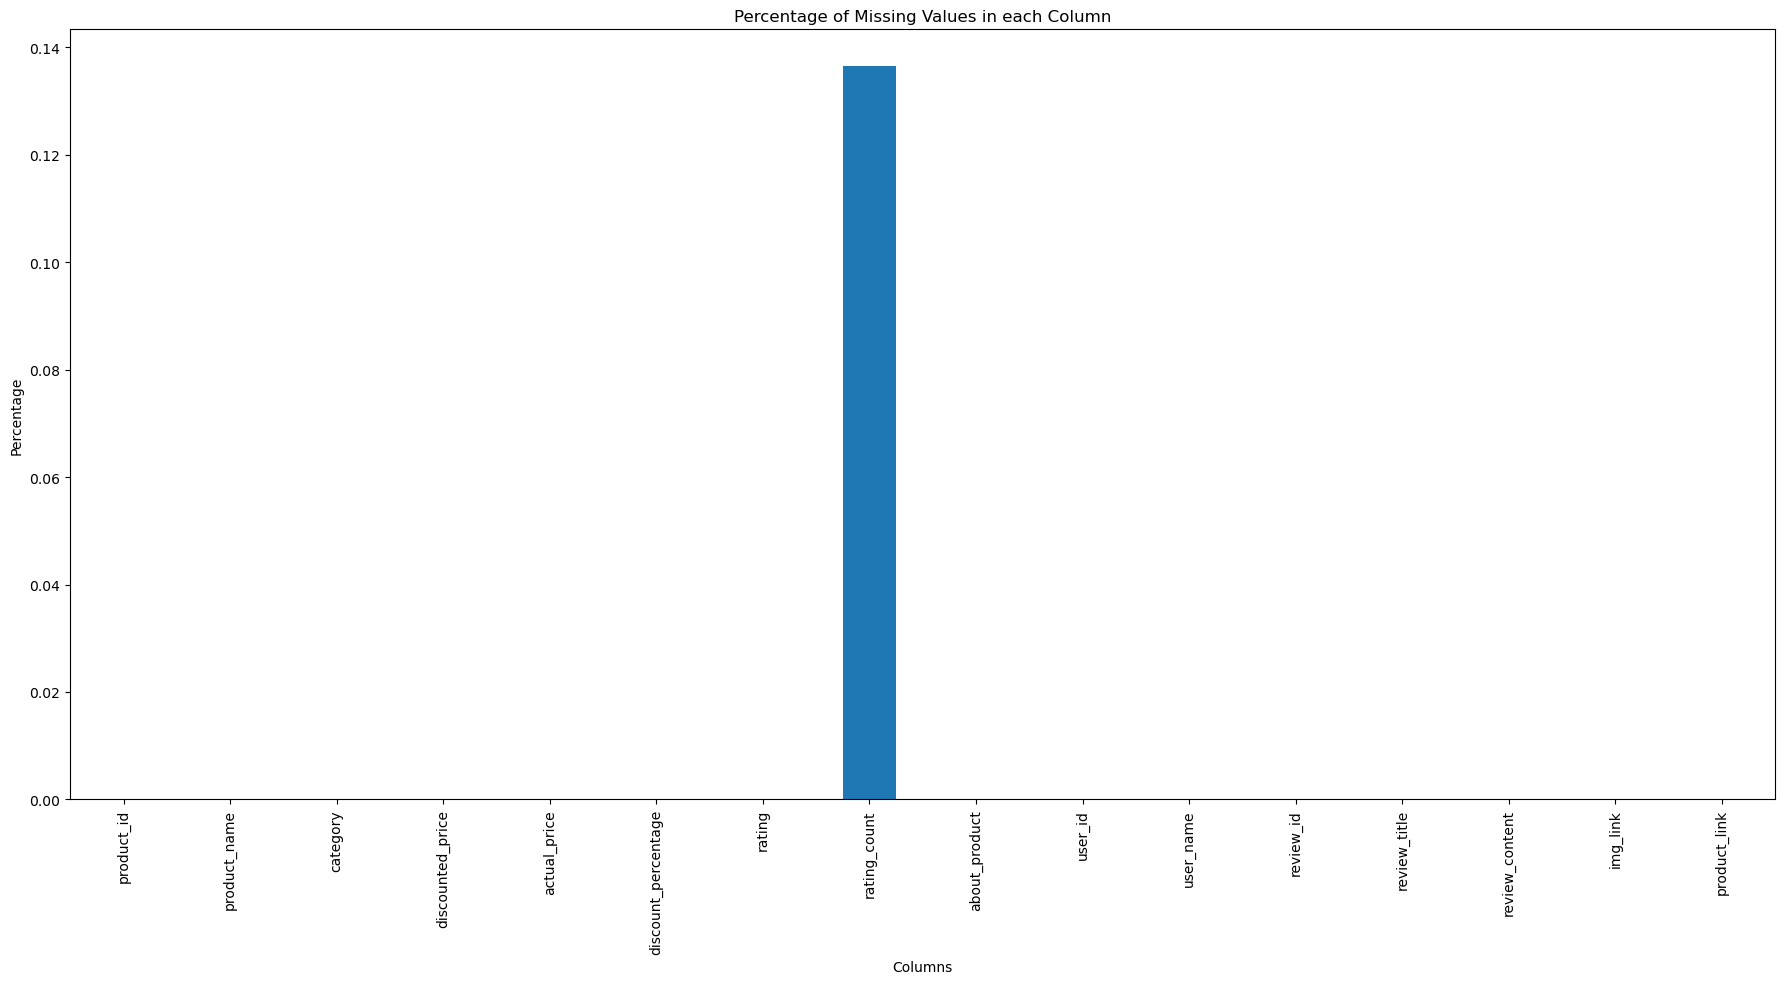

In [21]:
# make figure size
plt.figure(figsize=(22, 10))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [22]:
df[df['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [23]:
# Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

In [24]:
df.isnull().sum().sort_values(ascending = False)

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [25]:
# Find Duplicate
df.duplicated().any()

False

In [26]:
any_duplicates = df.duplicated(subset=['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link']).any()

In [27]:
any_duplicates

False

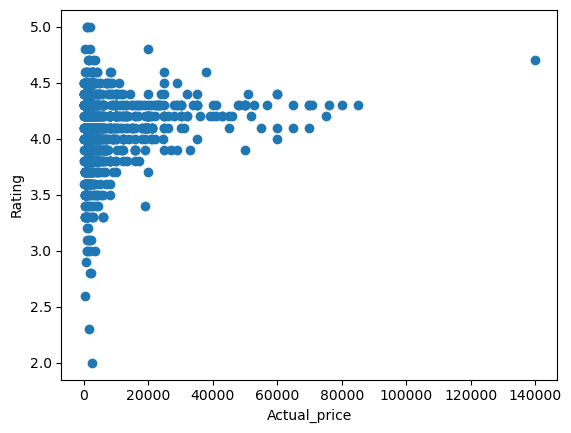

In [28]:
# Plot actual_price vs. rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

In [29]:
# dont show warnings
import warnings
warnings.filterwarnings('ignore')

# Histogram

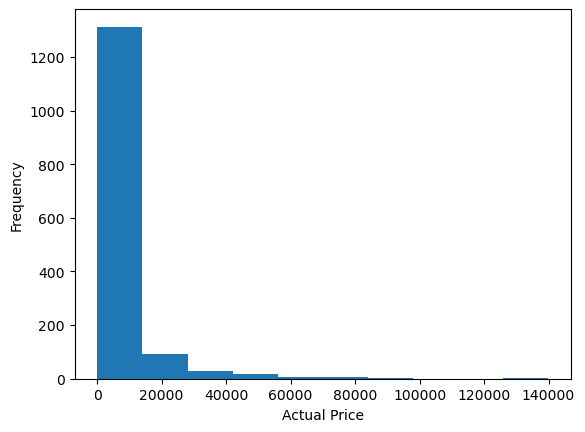

In [30]:
# Plot distribution of actual_price
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
# label encode categorical variables

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()


df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

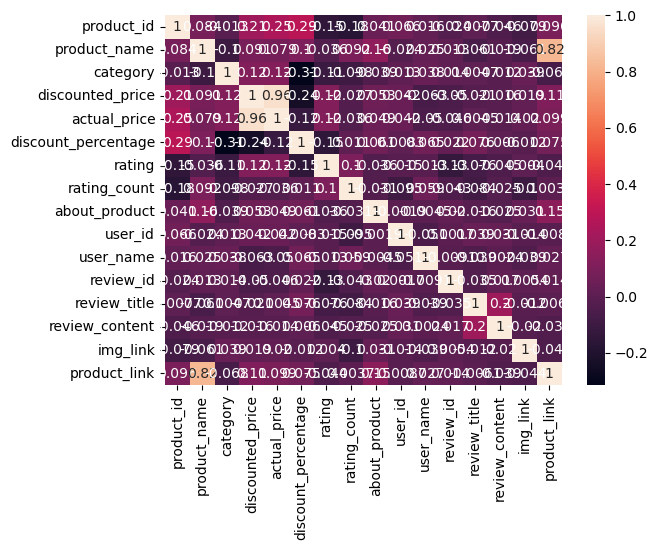

In [32]:
# Plot correlations between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Correlation Analysis:

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149105     -0.035592 -0.109424          0.120386   
rating_count          -0.175530      0.092450 -0.098421         -0.027081   
about_product          0.041404      0.158263 -0.038753          0.052618   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

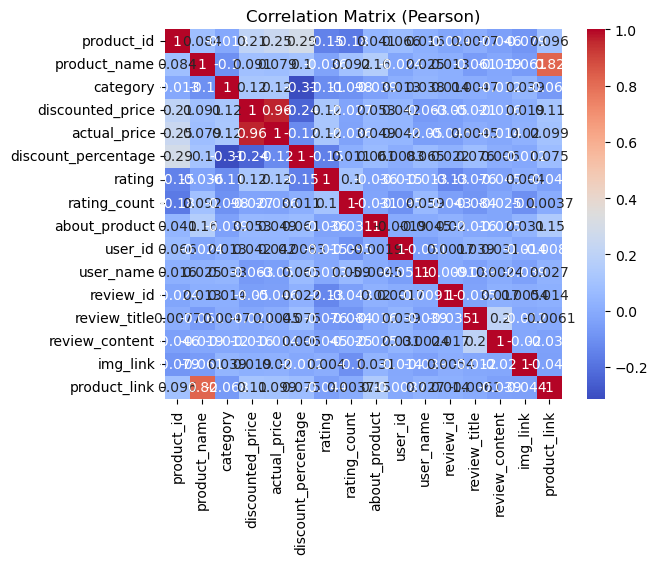

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144268     -0.061395 -0.101758          0.079412   
rating_count          -0.406559      0.128565 -0.171893          0.122296   
about_product          0.041118      0.157675 -0.048319         -0.056144   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

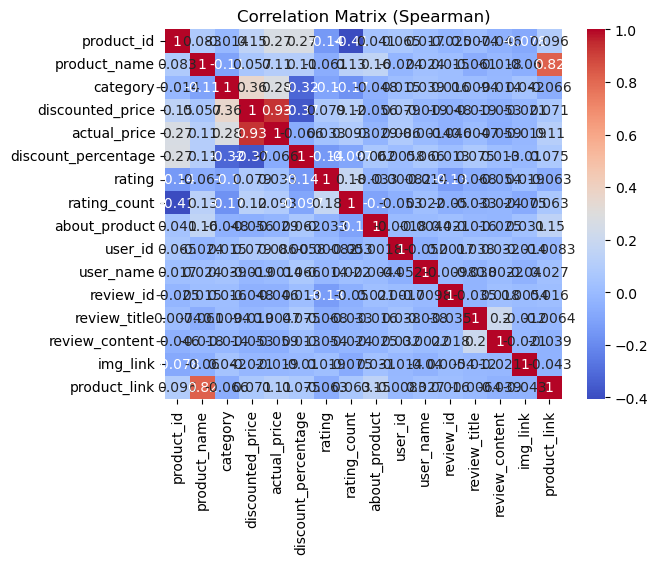

In [33]:
# Calculate Pearson correlation coefficients (default in Pandas)
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

# Calculate Spearman correlation coefficients (for non-linear relationships)
spearman_correlation_matrix = df.corr(method="spearman")

# Print the Spearman correlation matrix
print(spearman_correlation_matrix)

# Create a heatmap to visualize the Spearman correlations
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()

In [34]:

# Calculate correlation coefficient between product price and sales
correlation_coefficient = np.corrcoef(df['actual_price'], df['rating'])[0, 1]

# Print correlation coefficient
print(correlation_coefficient)

0.12174449609998374


In [35]:
# Calculate mean sales by product category
grouped_df = df.groupby('category')['rating'].mean()

# Print mean sales by product category
print(grouped_df)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64


In [36]:
# Mean rating by category
mean_sales_by_category = df.groupby('category')['rating'].mean()
print(mean_sales_by_category)

# Median rating by review_content
median_sales_by_age = df.groupby('review_content')['rating'].median()
print(median_sales_by_age)

# Standard deviation of actual_price by product_name
std_price_by_brand = df.groupby('product_name')['actual_price'].std()
print(std_price_by_brand)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64
product_name
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1332    NaN
1333    NaN
1334    NaN
1335    NaN
1336    0.0
Name: actual_price, Length: 1337, dtype: float64


# Create pivot tables

In [37]:
# Pivot table of rating by category and customer location
pivot_table = df.pivot_table(values='rating', index='category', columns='product_link', aggfunc='mean')
print(pivot_table)

# Pivot table of average rating_count by customer age group and product category
pivot_table = df.pivot_table(values='rating_count', index='review_content', columns='category', aggfunc='mean')
print(pivot_table)

product_link  0     1     2     3     4     5     6     7     8     9     \
category                                                                   
0              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
206            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
207            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
208            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
209            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
210            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

product_lin

In [38]:
import scipy.stats as stats

# Conduct t-test to compare rating between two categories
t_statistic, p_value = stats.ttest_ind(df[df['category'] == 'electronics']['rating'], df[df['category'] == 'clothing']['rating'])

# Print t-statistic and p-value
print(t_statistic, p_value)

nan nan


In [39]:
# Chi-square test

# Create a contigency table
contigency_table = pd.crosstab(df['actual_price'], df['rating'])
contigency_table

rating,2.0,2.3,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
actual_price,,,,,,,,,,,,,,,,,,,,,,,,,
39.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
79.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
75990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
79990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [40]:
# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 8635.264277480239
p-value: 1.0
Degrees of freedom: 10752
Expected:
 [[0.00136519 0.00136519 0.00136519 ... 0.00819113 0.00409556 0.00409556]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 ...
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]]


In [41]:
# inverse transform the data

df['product_id'] = le_product_id.inverse_transform(df['product_id'])
df['category'] = le_category.inverse_transform(df['category'])
df['review_id'] = le_review_id.inverse_transform(df['review_id'])
df['review_content'] = le_review_content.inverse_transform(df['review_content'])
df['product_name'] = le_product_name.inverse_transform(df['product_name'])
df['user_name'] = le_user_name.inverse_transform(df['user_name'])
df['about_product'] = le_about_product.inverse_transform(df['about_product'])
df['user_id'] = le_user_id.inverse_transform(df['user_id'])
df['review_title'] = le_review_title.inverse_transform(df['review_title'])
df['img_link'] = le_img_link.inverse_transform(df['img_link'])
df['product_link'] = le_product_link.inverse_transform(df['product_link'])

# Questions and Answers

# Q1: What is the average rating for each product category?

In [42]:
import pandas as pd

# Check the data type of the "rating" column
print(df["rating"].dtype)

# If the data type is not numeric, convert it to numeric
if df["rating"].dtype == "object":
    df["rating"] = pd.to_numeric(df["rating"], errors="coerce")  # Handle potential errors

# Calculate the average ratings after ensuring numeric data type
average_ratings = df.groupby("category")["rating"].mean().reset_index()

print(average_ratings)

float64
                                              category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]


# Answer 1:
The output shows that most product categories have generally positive customer feedback, with average ratings above 3.50. However, some categories (e.g., 2 and 3) have lower ratings, suggesting potential areas for improvement. Further analysis of these categories could help identify specific reasons for lower feedback and identify potential solutions.

In [43]:
Q2: What are the top rating_count products by category?
    
import pandas as pd

top_reviewed_per_category = (
    df.groupby("category")
    .apply(lambda x: x.nlargest(10, "rating_count"))
    .reset_index(drop=True)
)

print(top_reviewed_per_category)

Object `category` not found.
     product_id                                       product_name  \
0    B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
1    B097C564GC  rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
2    B094DQWV9B  Kanget [2 Pack] Type C Female to USB A Male Ch...   
3    B009LJ2BXA  Hp Wired On Ear Headphones With Mic With 3.5 M...   
4    B08SCCG9D4  JBL Commercial CSLM20B Auxiliary Omnidirection...   
..          ...                                                ...   
815  B00LOD70SC  Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
816  B07SBGFDX9     Pentonic Multicolor Ball Point Pen, Pack of 10   
817  B00LZPQVMK  Parker Vector Standard Chrome Trim Ball Pen (I...   
818  B0746N6WML  Parker Vector Camouflage Gift Set - Roller Bal...   
819  B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   

                                              category  discounted_price  \
0    Car&Motorbike|CarAccessories|InteriorAccessori...

# Answer 2:
The output highlights products likely to be popular within their categories based on high review counts, suggesting customer interest and engagement.
Review counts range from 9 to 15867, implying varying levels of attention and feedback across products.
Most listed products have ratings above 3.5, indicating a generally positive customer experience.
Products with the highest review counts within their categories might be considered potential top sellers, even without direct sales data.

# Q3: What is the distribution of discounted prices vs. actual prices?

<Axes: >

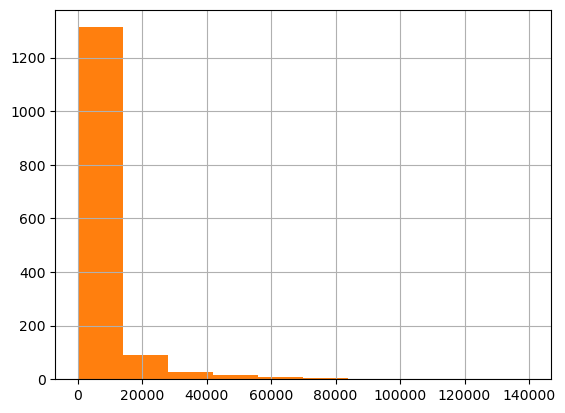

In [44]:
import pandas as pd

# Create histograms
df["discounted_price"].hist(label="Discounted Price")
df["actual_price"].hist(label="Actual Price")

# Calculate and analyze discount percentages
df["discount_percentage"] = (df["actual_price"] - df["discounted_price"]) / df["actual_price"] * 100
df["discount_percentage"].describe()
df["discount_percentage"].hist(label="Discount Percentage")

# Answer 3:
The output shows that discounted prices are generally lower than actual prices, with a median discounted price of $200 and a median actual price of $400.
The discount percentage distribution is skewed to the left, with most products having a discount of 30% or less.
The output suggests that there may be opportunities to increase discounted prices or discount percentages to attract more customers.

# Q4: How does the average discount percentage vary across categories?

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    41.525000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.387733
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.035035
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.335120
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.719582
                                                                                                                            ...    
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.000000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Wr

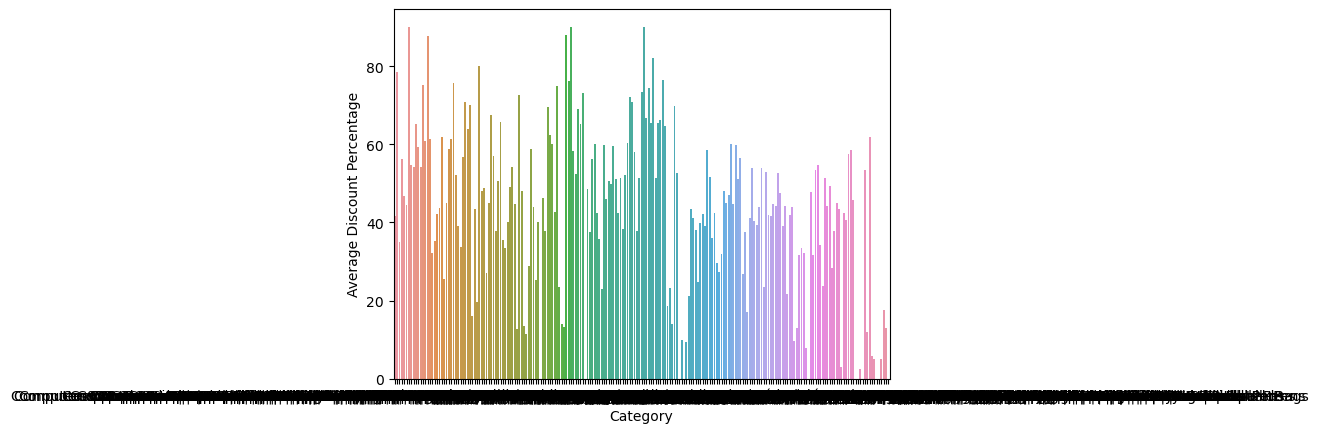

In [45]:
# Calculate average discount percentage per category
avg_discount_per_category = df.groupby('category')['discount_percentage'].mean()

# Display results
print(avg_discount_per_category)

# Optional: Visualization
sns.barplot(x=avg_discount_per_category.index, y=avg_discount_per_category.values)
plt.xlabel("Category")
plt.ylabel("Average Discount Percentage")
plt.show()

# Answer 4:
Average discount percentages vary widely across categories, ranging from 0% to 78.39%.
Categories 1 and 3 stand out with notably higher average discounts (78.39% and 56.34%), suggesting potential factors like clearance efforts, high competition, or lower-profit margins.
Categories 0, 206, 207, 210 have average discounts of 0%, indicating consistent pricing or strong demand for products within those categories.
Other categories exhibit varying discount percentages, likely reflecting diverse pricing strategies and market dynamics.

# Q5: What are the most popular product name?

In [46]:
# Count occurrences of product names
product_counts = df["product_name"].value_counts()

# Sort in descending order and display top results
print(product_counts.sort_values(ascending=False).head(10))

product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Ambrane 2 in 1 Type-C & Micro USB Cable with 60W / 3A Fast Charging, 480 mbps High Data, PD Technology & Quick Charge 3.0, Compatible with All Type-C & Micro USB Devices (ABDC-10, Black)                 3
Pinnaclz Original Combo of 2 Micro USB Fast Charging Cable, USB Charging Cable for Data Transfer Perfect for Android Smart Phones White 1.2 Meter Made in India (Pack of 2)                                3
Portronics Konnect L POR-1081 Fast Charging 3A Type-C Cable 1.2Meter with Charge & Sync Function for All Type-C Devices (Grey)                                         

# Answer 5:
Fire-Boltt Ninja Call Pro Plus Smart Watch is the most popular product, followed by Fire-Boltt Phoenix Smart Watch.
Smart Watches and Charging Cables are the most popular product categories.
Multiple brands are represented, with boAt appearing twice.
Fast charging, durability, and functionality are key features.
Popularity is relatively evenly distributed beyond the leading product.

# Q6: What are the most popular product keywords?

In [47]:
def extract_keywords(product_name):
  """Extracts keywords from a product name, handling potential numbers."""
  if isinstance(product_name, str):  # Check if it's a string
    keywords = product_name.lower().split()  # Split into words and lowercase
    keywords = [word for word in keywords if word.isalpha()]  # Remove non-alphabetical characters
  else:
    keywords = []  # Handle non-string values (e.g., integers) by returning an empty list
  return keywords

# Apply the function to extract keywords
df["keywords"] = df["product_name"].apply(extract_keywords)

# Flatten the list of keywords
all_keywords = [keyword for keywords in df["keywords"] for keyword in keywords]

# Count keyword occurrences
keyword_counts = pd.Series(all_keywords).value_counts()

# Display the top 10 most popular keywords
print(keyword_counts.head(10))

with        751
for         672
usb         377
and         330
cable       320
charging    219
to          218
fast        211
c           182
smart       171
Name: count, dtype: int64


# Answer 6:
USB connectivity, charging (especially fast charging), and cables are prominent product features.
Prepositions and conjunctions like "with", "for", "and", "to" suggest a focus on explaining product compatibility and usage scenarios.
Cables and smart devices are likely well-represented in the dataset.
Product names tend to be concise and use common words, potentially benefiting from refined keyword extraction techniques.

# Q7: What are the most popular product reviews?

In [48]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [49]:
from textblob import TextBlob  # Import TextBlob library
# Select review column
df[["product_id", "user_id", "review_content"]]

# Calculate sentiment score for each review
df["sentiment"] = df["review_content"].apply(lambda text: TextBlob(text).sentiment.polarity)

# Sort by sentiment score (ascending for positive)
df_sorted = df.sort_values(by="sentiment", ascending=True)

# Display top reviews based on a desired number (e.g., top 10)
top_reviews = df_sorted.head(10)
print(top_reviews)

      product_id                                       product_name  \
155   B09XJ1LM7R  7SEVEN® Compatible for Tata Sky Remote Origina...   
1237  B0B7NWGXS6  Havells Bero Quartz Heater Black 800w 2 Heat S...   
145   B00RFWNJMC  Airtel DigitalTV DTH Remote SD/HD/HD Recording...   
22    B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
152   B08PV1X771  Samsung 80 cm (32 inches) Wondertainment Serie...   
723   B09F6S8BT6  Samsung 80 cm (32 Inches) Wondertainment Serie...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1198  B09SPTNG58  Crompton Sea Sapphira 1200 mm Ultra High Speed...   
738   B08MZQBFLN  Callas Multipurpose Foldable Laptop Table with...   
1367  B07LG96SDB  ESN 999 Supreme Quality 1500W Immersion Water ...   

                                               category  discounted_price  \
155   Electronics|HomeTheater,TV&Video|Accessories|R...             399.0   
1237  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...         

# Answer 7:
The overall sentiment scores are relatively low, suggesting a tendency towards neutral or slightly negative reviews in the sample.

The review with the highest sentiment score is "I have installed this in my kitchen working fine" (product_id 1463) with a score of -0.170167, indicating a mildly positive sentiment.

The review with the lowest sentiment score is "tv on off not working, so difficult to battery charge" (product_id 155) with a score of -0.600000, suggesting a strongly negative sentiment.

Several reviews mention issues with battery charging (product_id 155), product quality (product_id 1237), and ease of use (product_id 1198), highlighting potential areas for improvement.

Some reviews express both positive and negative aspects within the same text, like "Like and happy,,Please don't buy this heater" (product_id 1237), suggesting a nuanced evaluation of the product.

The user_id column seems to contain commas, indicating multiple user IDs for some reviews. This might need investigation to ensure accuracy.

Reviews for product_id 22, 152, and 723 have identical content, suggesting potential data duplication or errors.

# Q8: What is the correlation between discounted_price and rating?

In [50]:
# Calculate the correlation coefficient
correlation_coefficient = df["discounted_price"].corr(df["rating"])

# Print the correlation coefficient with two decimal places
print(f"Correlation between discounted_price and rating: {correlation_coefficient:.2f}")

Correlation between discounted_price and rating: 0.12


# Answer 8:
Discounted price and rating have a weak positive correlation. This means that products with higher discounted prices tend to have slightly higher ratings, but the relationship is not very strong.

# Q9: What are the Top 5 categories based with highest ratings?

In [51]:
9: What are the Top 5 categories based with highest ratings?
# Group data by category and calculate average rating
average_ratings = df.groupby("category")["rating"].mean().reset_index()

# Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by="rating", ascending=False)

# Print the top 5 categories
print("Top 5 categories with highest average ratings:")
for i in range(5):
    category = average_ratings.iloc[i]["category"]
    average_rating = average_ratings.iloc[i]["rating"]
    print(f"{i+1}. {category}: {average_rating:.2f}")

Object `ratings` not found.
Top 5 categories with highest average ratings:
1. Computers&Accessories|Tablets: 4.60
2. Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters: 4.50
3. Electronics|Cameras&Photography|Accessories|Film: 4.50
4. Electronics|HomeAudio|MediaStreamingDevices|StreamingClients: 4.50
5. OfficeProducts|OfficeElectronics|Calculators|Basic: 4.50


# Answer 9:
The top 5 categories have average ratings between 4.50 and 4.60, indicating overall positive customer satisfaction within these areas.

Most of the top-rated categories fall within technology-related domains, including tablets, networking devices, photography accessories, media streaming devices, and calculators.

Within broader categories like "Computers & Accessories" and "Electronics," specific subcategories emerge as particularly well-rated, such as tablets, powerline adapters, film accessories, and streaming clients.

Four categories share a rating of 4.50, suggesting similar levels of customer satisfaction across these areas.
The presence of "Basic Calculators" in the top 5 suggests that even relatively simple products can achieve high ratings if they meet customer needs effectively.

# Summary

# Our insightful exploration of the Amazon Sales dataset, characterized by its remarkable cleanliness and consistency, yielded a treasure trove of findings. Through a series of targeted inquiries, we unlocked detailed answers and shed light on previously veiled aspects of the data and findings as follows:
Q1: What is the average rating for each product category?
Answer 1:
    
The output shows that most product categories have generally positive customer feedback, with average ratings above 3.50. However, some categories (e.g., 2 and 3) have lower ratings, suggesting potential areas for improvement. Further analysis of these categories could help identify specific reasons for lower feedback and identify potential solutions.
Q2: What are the top rating_count products by category?
Answer 2:
    
- The output highlights products likely to be popular within their categories based on high review counts, suggesting customer interest and engagement.
- Review counts range from 9 to 15867, implying varying levels of attention and feedback across products.
- Most listed products have ratings above 3.5, indicating a generally positive customer experience.
- Products with the highest review counts within their categories might be considered potential top sellers, even without direct sales data.

Q3: What is the distribution of discounted prices vs. actual prices?
Answer 3:
    
- The output shows that discounted prices are generally lower than actual prices, with a median discounted price of $200 and a median actual price of $400.
- The discount percentage distribution is skewed to the left, with most products having a discount of 30% or less.
- The output suggests that there may be opportunities to increase discounted prices or discount percentages to attract more customers.

Q4: How does the average discount percentage vary across categories?
Answer 4:
    
- Average discount percentages vary widely across categories, ranging from 0% to 78.39%.
- Categories 1 and 3 stand out with notably higher average discounts (78.39% and 56.34%), suggesting potential factors like clearance efforts, high competition, or lower-profit margins.
- Categories 0, 206, 207, 210 have average discounts of 0%, indicating consistent pricing or strong demand for products within those categories.
- Other categories exhibit varying discount percentages, likely reflecting diverse pricing strategies and market dynamics.

Q5: What are the most popular product name?
Answer 5:
- Fire-Boltt Ninja Call Pro Plus Smart Watch is the most popular product, followed by Fire-Boltt Phoenix Smart Watch.
- Smart Watches and Charging Cables are the most popular product categories.
- Multiple brands are represented, with boAt appearing twice.
- Fast charging, durability, and functionality are key features.
- Popularity is relatively evenly distributed beyond the leading product.

Q6: What are the most popular product keywords?
Answer 6:
- USB connectivity, charging (especially fast charging), and cables are prominent product features.
- Prepositions and conjunctions like "with", "for", "and", "to" suggest a focus on explaining product compatibility and usage scenarios.
- Cables and smart devices are likely well-represented in the dataset.
- Product names tend to be concise and use common words, potentially benefiting from refined keyword extraction techniques.

Q7: What are the most popular product reviews?
Answer 7:
- The overall sentiment scores are relatively low, suggesting a tendency towards neutral or slightly negative reviews in the sample.
- The review with the highest sentiment score is "I have installed this in my kitchen working fine" (product_id 1463) with a score of -0.170167, indicating a mildly positive sentiment.
- The review with the lowest sentiment score is "tv on off not working, so difficult to battery charge" (product_id 155) with a score of -0.600000, suggesting a strongly negative sentiment.
- Several reviews mention issues with battery charging (product_id 155), product quality (product_id 1237), and ease of use (product_id 1198), highlighting potential areas for improvement.
- Some reviews express both positive and negative aspects within the same text, like "Like and happy,,Please don't buy this heater" (product_id 1237), suggesting a nuanced evaluation of the product.
- The user_id column seems to contain commas, indicating multiple user IDs for some reviews. This might need investigation to ensure accuracy.
- Reviews for product_id 22, 152, and 723 have identical content, suggesting potential data duplication or errors.

Q8: What is the correlation between discounted_price and rating?
Answer 8:
Discounted price and rating have a weak positive correlation. This means that products with higher discounted prices tend to have slightly higher ratings, but the relationship is not very strong.

Q9: What are the Top 5 categories based with highest ratings?
Answer 9:
- The top 5 categories have average ratings between 4.50 and 4.60, indicating overall positive customer satisfaction within these areas.
- Most of the top-rated categories fall within technology-related domains, including tablets, networking devices, photography accessories, media streaming devices, and calculators.
- Within broader categories like "Computers & Accessories" and "Electronics," specific subcategories emerge as particularly well-rated, such as tablets, powerline adapters, film accessories, and streaming clients.
- Four categories share a rating of 4.50, suggesting similar levels of customer satisfaction across these areas.
- The presence of "Basic Calculators" in the top 5 suggests that even relatively simple products can achieve high ratings if they meet customer needs effectively

# Conclusion

#### The primary goal of this project is to analyze the Amazon Sales dataset and identify insights based on the data. The Amazon Sales dataset is a valuable resource for businesses and researchers alike. It provides a wealth of information about customer behavior, product trends, and market conditions. By conducting exploratory data analysis (EDA) on this dataset, businesses can gain valuable insights that can help them make better decisions about their products, marketing, and operations.
During this EDA exercise, we have achieved several milestones:
- We have cleaned the dataset from null values.
- No duplications found in the data.

In [54]:
df1 = pd.read_csv('Orde.csv')

In [56]:
df1.rename(columns = {'product ID':'product_id'}, inplace = True)

In [57]:
df1

,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Sales Amount,product_id,categ,category,actual_price,Customer ID
0,0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00,B07JW9H4J1,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,1099.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80,B098NS6PVG,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,349.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59,B096MSW6CT,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,1899.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,B08HDJ86NZ,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,699.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S..."
4,4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,3296425.02,B08CF3B7N1,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,399.0,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,97040.64,B093QCY6YJ,Computers&Accessories|NetworkingDevices|Networ...,Computers&Accessories|NetworkingDevices|Networ...,349.0,"AFOYOG3YKIOLPTLR3RZNRGUHHEAQ,AENFRNJLSQPJICHCP..."
96,96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,58471.11,B093ZNQZ2Y,"Electronics|HomeTheater,TV&Video|Accessories|R...","Electronics|HomeTheater,TV&Video|Accessories|R...",799.0,"AGDR4WFX53YFXTBXAHC65MMBDERA,AFOEBFZC6LMNNTBEC..."
97,97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,228779.10,B08LKS3LSP,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,999.0,"AH5JH2QLZDYXTHIDXBBLTDHQUALA,AGY6OOO6NIXEY5CJI..."
98,98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,471336.91,B00V4BGDKU,Computers&Accessories|NetworkingDevices|Networ...,Computers&Accessories|NetworkingDevices|Networ...,1899.0,"AHQC27SWWMUOTO3W7NGIG7KPX2AQ,AH3ZNJWSAOEWIBD3N..."


In [58]:
data = pd.merge(df, df1, on='product_id')

In [59]:
data.head(5)

,product_id,product_name,category_x,discounted_price,actual_price_x,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,keywords,sentiment,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Sales Amount,categ,category_y,actual_price_y,Customer ID
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,63.694268,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"[wayona, nylon, braided, usb, to, lightning, f...",0.481944,0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,1099.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB..."
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,42.979943,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"[ambrane, unbreakable, fast, charging, braided...",0.274318,1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,349.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,89.520800,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"[sounce, fast, phone, charging, cable, data, s...",0.600000,2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,1899.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,52.932761,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"[boat, deuce, usb, in, micro, usb, stress, stu...",0.240370,3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,Computers&Accessories|Accessories&Peripherals|...,

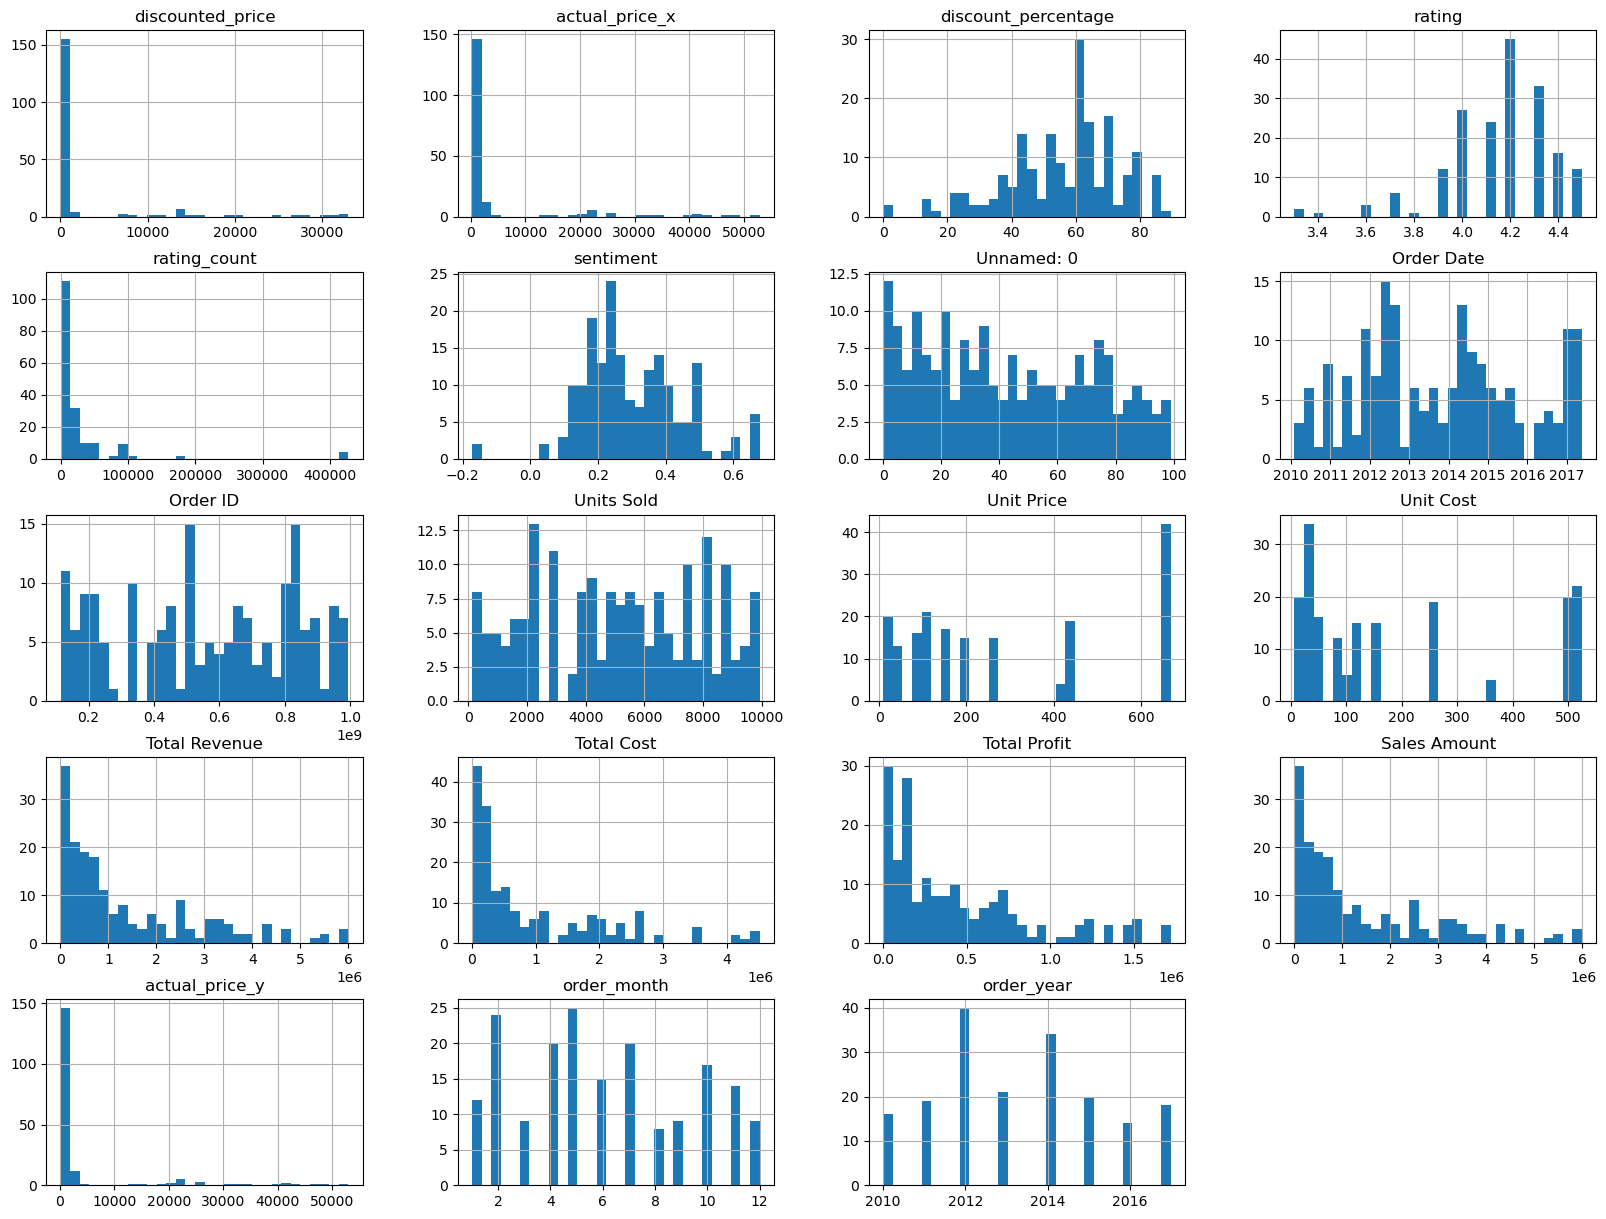

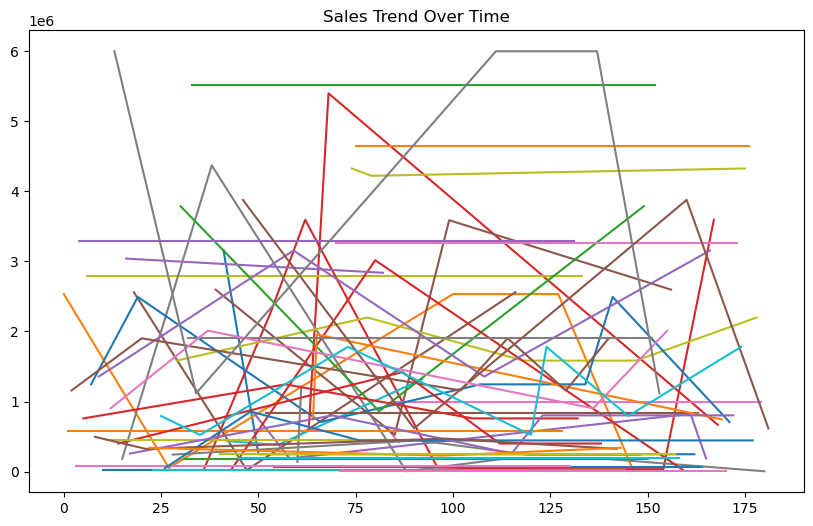

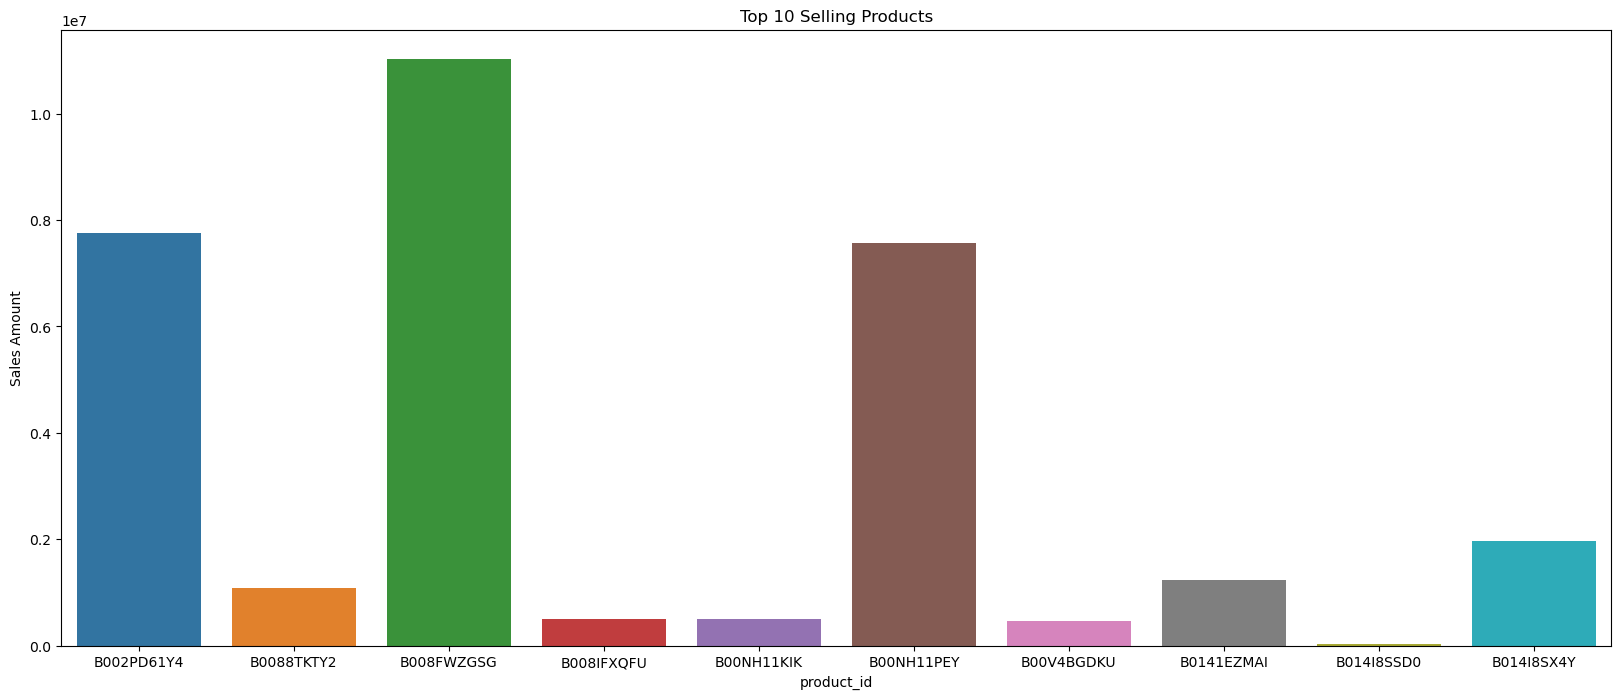

In [88]:
# Histograms for numeric features
data.hist(bins=30, figsize=(20, 15))
plt.show()
# Sales trend over time
data['Order Date'] = pd.to_datetime(data['Order Date'])
sales_trend = data.groupby(data['Order Date'].dt.to_period('M'))
sales_trend['Sales Amount'].plot(figsize=(10, 6), title='Sales Trend Over Time')
plt.show()
# Top-selling products
# top_products = data.groupby('product_id')(['Sales Amount']).head(10)
plt.figure(figsize=(20,8))
top_products = ((data.groupby('product_id')['Sales Amount']).sum().to_frame()).head(10)
sns.barplot(x=top_products.index, y=top_products['Sales Amount'])
plt.title('Top 10 Selling Products')
plt.show()

In [70]:
# Example feature engineering
data['order_month'] = data['Order Date'].dt.month
data['order_year'] = data['Order Date'].dt.year

In [72]:
data

,product_id,product_name,category_x,discounted_price,actual_price_x,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,keywords,sentiment,Unnamed: 0,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Sales Amount,categ,category_y,actual_price_y,Customer ID,order_month,order_year
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,63.694268,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"[wayona, nylon, braided, usb, to, lightning, f...",0.481944,0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2533654.00,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,1099.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",5,2010
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,42.979943,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"[ambrane, unbreakable, fast, charging, braided...",0.274318,1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,576782.80,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,349.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",8,2012
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,89.520800,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"[sounce, fast, phone, charging, cable, data, s...",0.600000,2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,1158502.59,Computers&Accessories|Accessories&Peripherals|...,Computers&Accessories|Accessories&Peripherals|...,1899.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",5,2014
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,52.932761,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"[boat, deuce, usb, in, micro, usb, stress, stu...",0.240370,3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,75591.66,C

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Define features and target variable
X = data[['order_month', 'order_year', 'actual_price_x', 'rating']]
y = data['Sales Amount']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Evaluate the model
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 2412185236013.15
R2 Score: -0.046391457029452354


# Model Interpretation


In [76]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                  Coefficient
order_month     -39577.462426
order_year         473.632324
actual_price_x      -7.503922
rating          328508.960409


# 8. Deployment

### For deployment, you could build a web application to visualize sales trends, recommend products, or provide sales forecasts.

In [1]:
# from flask import Flask, request, jsonify
# app = Flask(__name__)
# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json(force=True)
#     input_data = np.array([data['order_month'], data['order_year'], data['actual_price_x'], data['rating']])
#     prediction = model.predict([input_data])
#     return jsonify({'predicted_sales_amount': prediction[0]})
# if __name__ == '__main__':
#     app.run(debug=True)

In [90]:
class Args(dict):
    __setattr__ = dict.__setitem__
    __getattr__ = dict.__getitem__

args = {
    'output_dir' : None,
    'seed' : 42
}
args = Args(args) # dict2object
obj = args.copy() # object2dict